In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage.filters import gaussian_filter1d

In [9]:
def load_data(models, hyperparams, dir_root="auto_experiments", eps=245, freq=20480):
    results = np.zeros((len(models), eps, 16))
    for n in range(len(models)):
        dir_exp = "%s_%s" % (models[n], hyperparams)
        for ep in range(eps):
            index = freq*ep
            dir_result = os.path.join(dir_root, dir_exp, "eval", "train_%d" % (index))
            seen = np.load(os.path.join(dir_result, "tot_incidents_seen.npy"))
            miss = np.load(os.path.join(dir_result, "tot_incidents_missed.npy"))
            if np.sum(miss<0)>0:
                print("yes")
            true_rate = np.load(os.path.join(dir_result, "tot_true_rates.npy"))
            seen = seen[:, :1000, :]
            miss = miss[:, :1000, :]
            #rewards = (seen-0.25*miss).sum(axis=(1,2))
            rewards = (-0.25*miss).sum(axis=(1,2))
            #rewards = rewards.mean(axis=1)
    
            # rewards = np.load(os.path.join(dir, dir_batch, "%s_%d" % (models[n], 10000*(batch_ep+1)), "tot_rews.npy"))
            # rewards = rewards[:, :1000].mean(axis=1)
    
            ratio = np.divide(seen.sum(axis=(0,1)), seen.sum(axis=(0,1))+miss.sum(axis=(0,1)))

            results[n, ep, 0] = index
            results[n, ep, 1] = rewards.mean()
            results[n, ep, 2] = rewards.min()
            results[n, ep, 3] = rewards.max()
            results[n, ep, 4] = np.max(ratio)-np.min(ratio)
            results[n, ep, 5] = true_rate[:, -1, :].sum(axis=1).mean(axis=0)
            results[n, ep, 6:11] = true_rate[:, -1, :].mean(axis=0)
            results[n, ep, 11:16] = ratio

            results[n, ep, 1] = gaussian_filter1d(results[n, ep, 1], sigma=1)
            results[n, ep, 2] = gaussian_filter1d(results[n, ep, 2], sigma=1)
            results[n, ep, 3] = gaussian_filter1d(results[n, ep, 3], sigma=1)
            results[n, ep, 4] = gaussian_filter1d(results[n, ep, 4], sigma=1)

    return results

In [10]:
ppo_models = ["G-PPO", "R-PPO", "A-PPO"]
ppo_colors = ["purple", "red", "blue", "green", "gray"]

# results_0_05 = load_data(ppo_models, "1e-06_30_0.0_0.5")
# results_0_1 = load_data(ppo_models, "1e-06_30_0.0_1.0")
# results_0_2 = load_data(ppo_models, "1e-06_30_0.0_2.0")
# results_0_5 = load_data(ppo_models, "1e-06_30_0.0_5.0")

# results_1_05 = load_data(ppo_models, "1e-06_30_0.01_0.5")
# results_1_1 = load_data(ppo_models, "1e-06_30_0.01_1.0")
# results_1_2 = load_data(ppo_models, "1e-06_30_0.01_2.0")
# results_1_5 = load_data(ppo_models, "1e-06_30_0.01_5.0")

# results_2_05 = load_data(ppo_models, "1e-06_30_0.02_0.5")
# results_2_1 = load_data(ppo_models, "1e-06_30_0.02_1.0")
# results_2_2 = load_data(ppo_models, "1e-06_30_0.02_2.0")
# results_2_5 = load_data(ppo_models, "1e-06_30_0.02_5.0")

# results_5_05 = load_data(ppo_models, "1e-06_30_0.05_0.5")
# results_5_1 = load_data(ppo_models, "1e-06_30_0.05_1.0")
# results_5_2 = load_data(ppo_models, "1e-06_30_0.05_2.0")
# results_5_5 = load_data(ppo_models, "1e-06_30_0.05_5.0")

# results_00 = load_data(ppo_models, "1e-06_ori_0")
# results_01 = load_data(ppo_models, "1e-06_ori_1")
# results_02 = load_data(ppo_models, "1e-06_ori_2")
results_0 = load_data(ppo_models, "1e-06_mod_0")
results_1 = load_data(ppo_models, "1e-06_mod_1")
results_2 = load_data(ppo_models, "1e-06_mod_2")

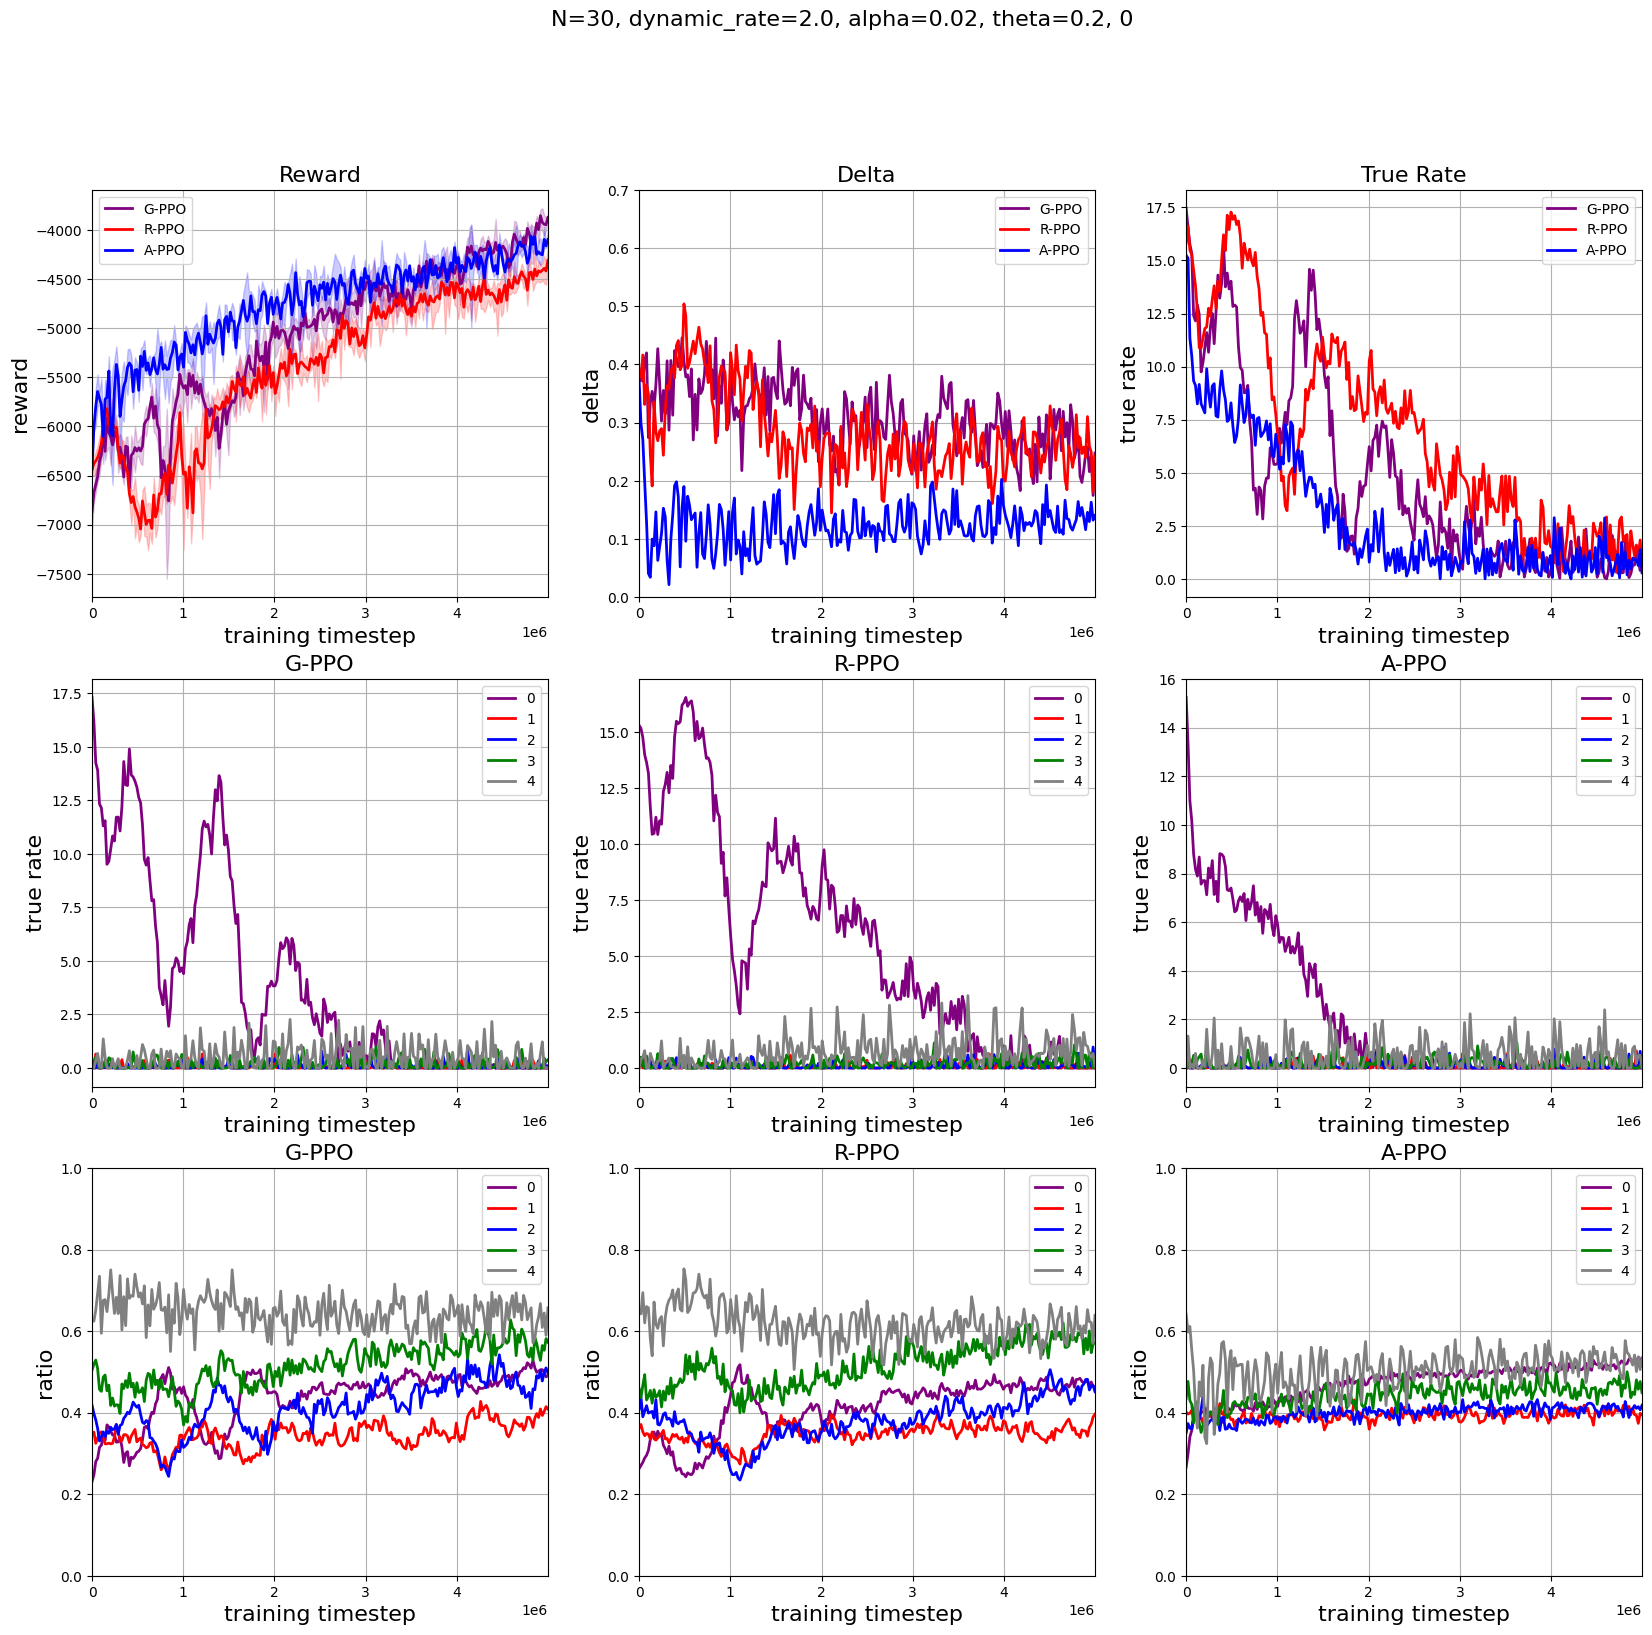

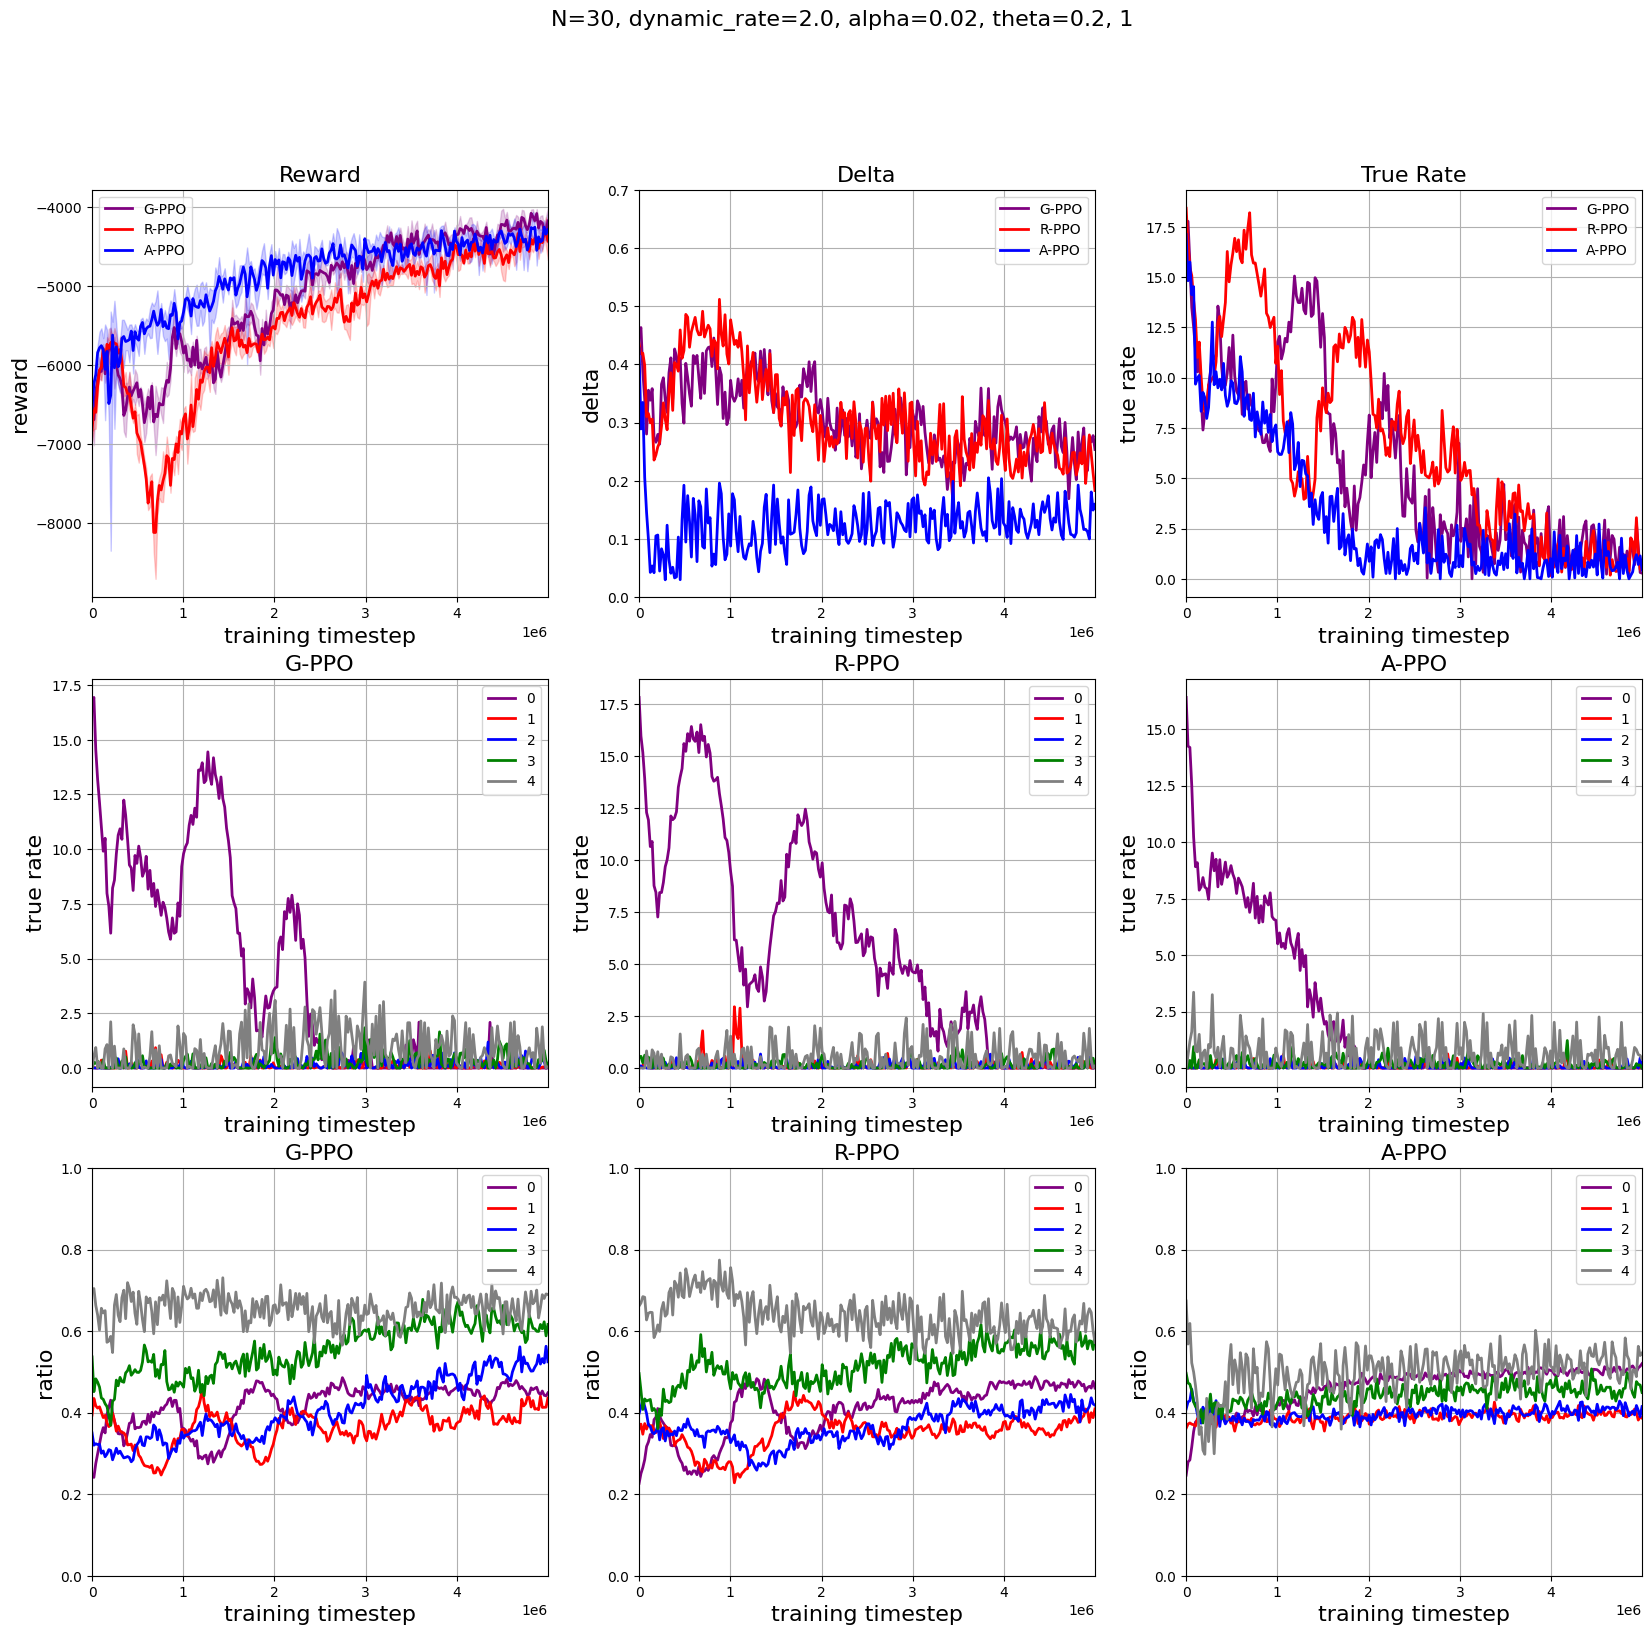

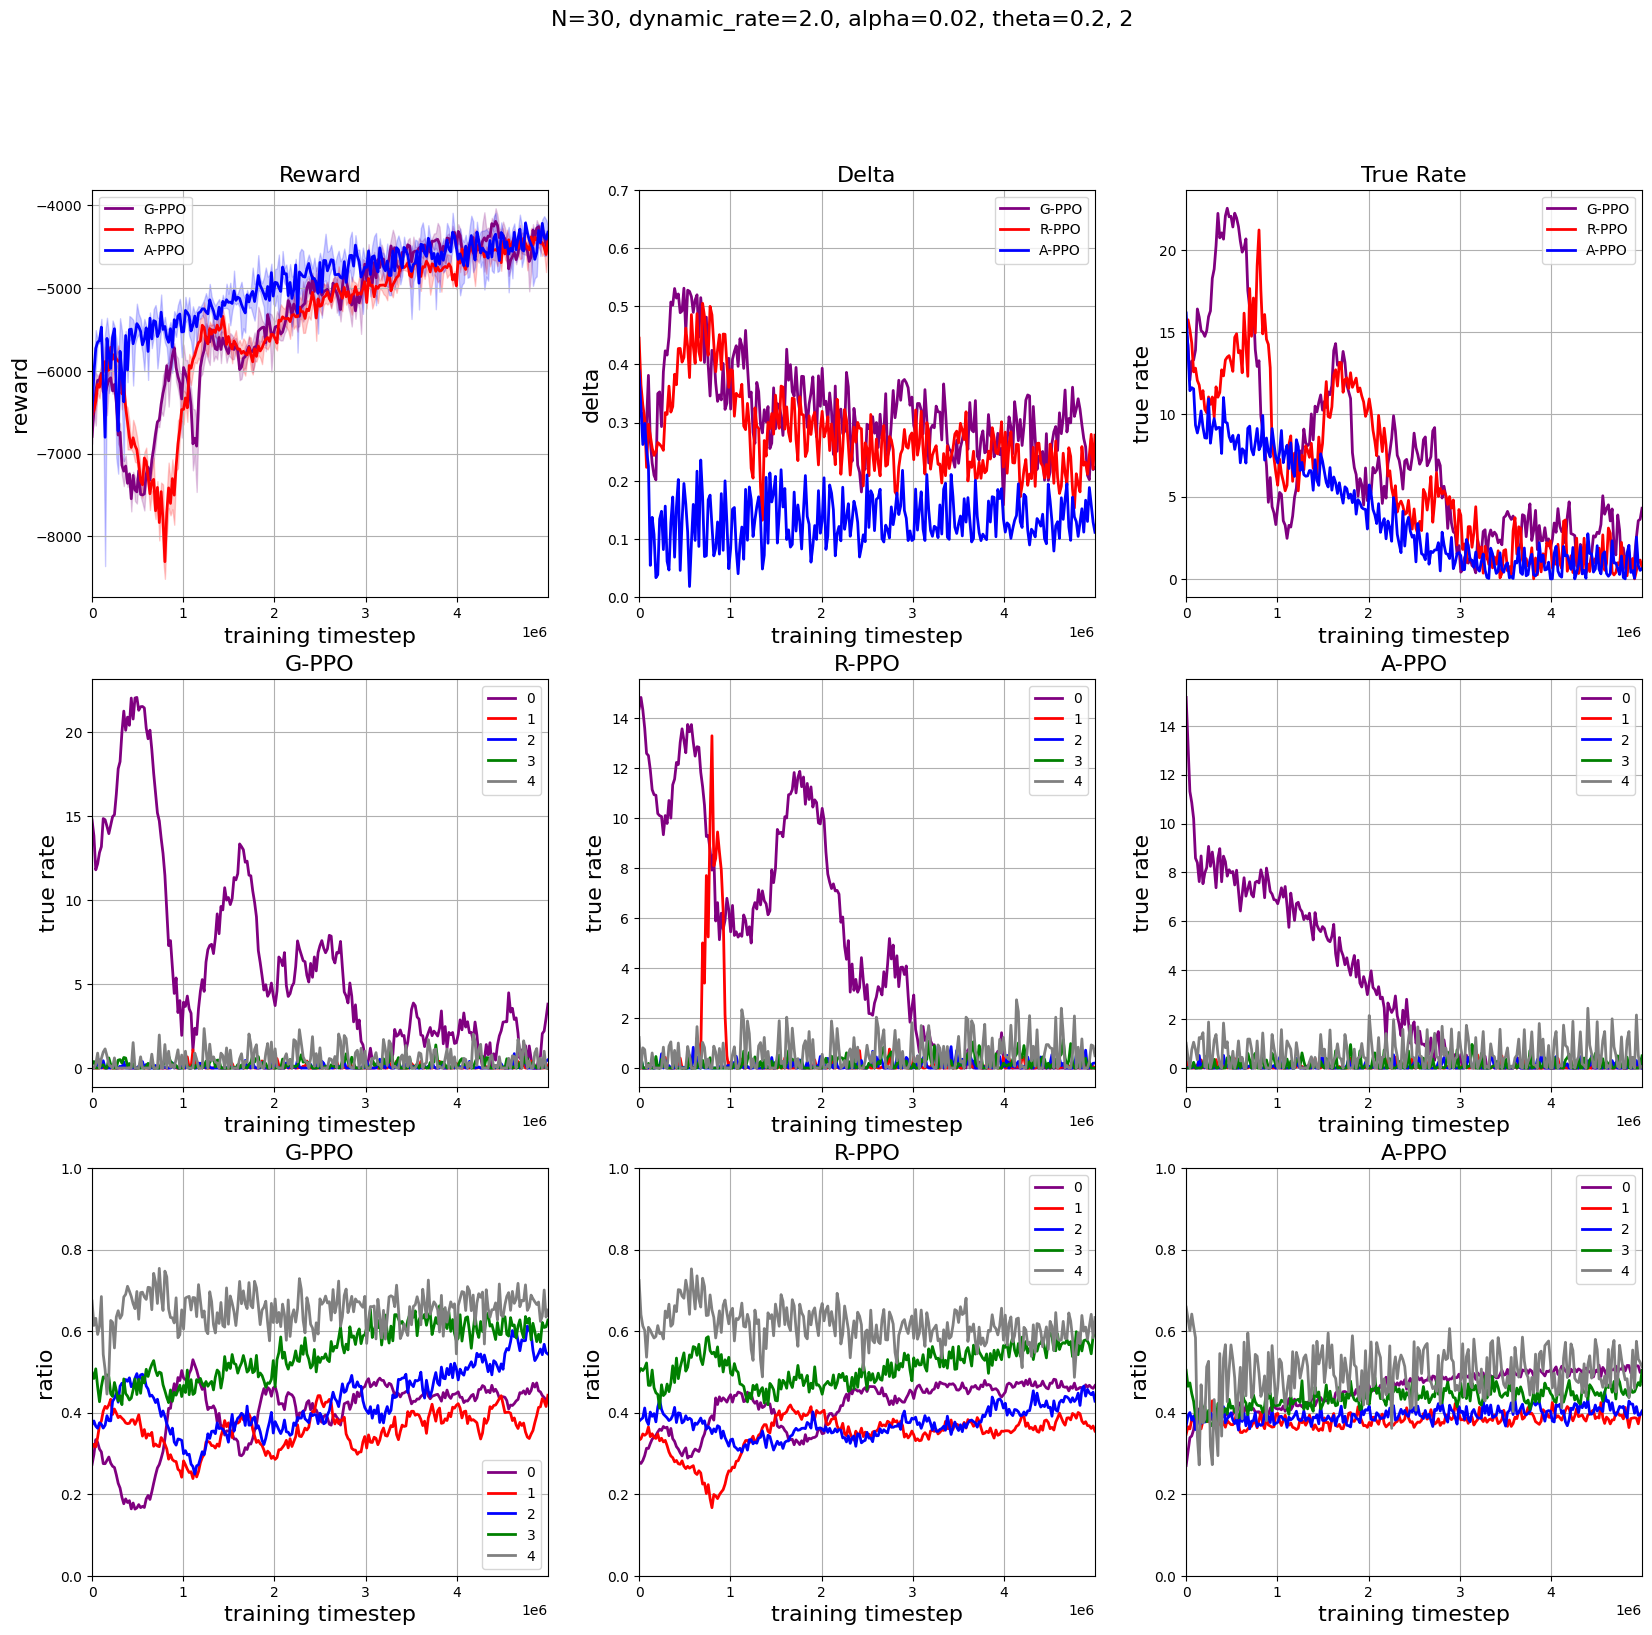

In [11]:
def plot_curves(models, results, colors, title, eps=245, freq=20480):
    width = (eps-1)*freq

    plt.figure(figsize=(20, 18))
    plt.suptitle(title, fontsize=16)
    plt.subplot(3, 3, 1)
    plt.title("Reward", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 1], linewidth=2, c=colors[n])
    for n in range(len(models)):
        plt.fill_between(results[n, :, 0], results[n, :, 2],results[n, :, 3], color=colors[n], alpha=0.2)
    plt.xlim((0, width))
    #plt.ylim((100, 600))
    plt.grid()
    plt.legend(models)
    plt.ylabel('reward', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)
    
    plt.subplot(3, 3, 2)
    plt.title("Delta", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 4], linewidth=2, c=colors[n], label='Group0')
    plt.xlim((0, width))
    plt.ylim((0, 0.7))
    plt.grid()
    plt.legend(models)
    plt.ylabel('delta', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)

    plt.subplot(3, 3, 3)
    plt.title("True Rate", fontsize=16)
    for n in range(len(models)):
        plt.plot(results[n, :, 0], results[n, :, 5], linewidth=2, c=colors[n], label='Group0')
    plt.xlim((0, width))
    #plt.ylim((0, 2.0))
    plt.grid()
    plt.legend(models)
    plt.ylabel('true rate', fontsize=16)
    plt.xlabel('training timestep', fontsize=16)

    for m in range(3):
        plt.subplot(3, 3, 4+m)
        plt.title(models[m], fontsize=16)
        for n in range(5):
            plt.plot(results[m, :, 0], results[m, :, n+6], linewidth=2, c=colors[n], label='Group0')
        plt.xlim((0, width))
        #plt.ylim((0, 2.0))
        plt.grid()
        plt.legend(["0","1","2","3","4"])
        plt.ylabel('true rate', fontsize=16)
        plt.xlabel('training timestep', fontsize=16)

    for m in range(3):
        plt.subplot(3, 3, 7+m)
        plt.title(models[m], fontsize=16)
        for n in range(5):
            plt.plot(results[m, :, 0], results[m, :, n+11], linewidth=2, c=colors[n], label='Group0')
        plt.xlim((0, width))
        plt.ylim((0, 1))
        plt.grid()
        plt.legend(["0","1","2","3","4"])
        plt.ylabel('ratio', fontsize=16)
        plt.xlabel('training timestep', fontsize=16)
    
# plot_curves(ppo_models, results_00, ppo_colors, "N=6, zeta_0=1, 0")
# plot_curves(ppo_models, results_01, ppo_colors, "N=6, zeta_0=1, 1")
# plot_curves(ppo_models, results_02, ppo_colors, "N=6, zeta_0=1, 2")
plot_curves(ppo_models, results_0, ppo_colors, "N=30, dynamic_rate=2.0, alpha=0.02, theta=0.2, 0")
plot_curves(ppo_models, results_1, ppo_colors, "N=30, dynamic_rate=2.0, alpha=0.02, theta=0.2, 1")
plot_curves(ppo_models, results_2, ppo_colors, "N=30, dynamic_rate=2.0, alpha=0.02, theta=0.2, 2")
